$\textbf{Short Discription:}$  
This Jupyter notebook primarily focuses on generating saliency map of the image. To simplify, I directly used the pretrained Resnet50 on Imagnet, then define a custom compute_saliency function to get and visualize the saliency map of the example image "ouzel". 

# Import libraries 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load Data

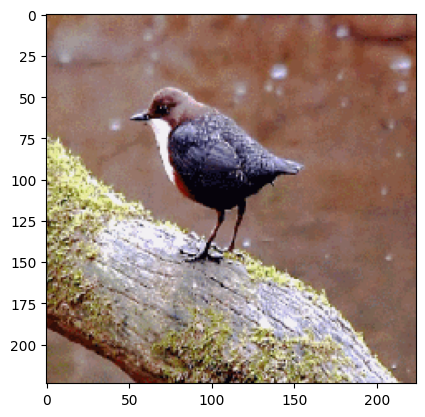

In [14]:
img_path = 'ouzel.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # preprocess the image
plt.imshow(img)

# Model 

Pretrained Restnet 

In [21]:
model = ResNet50(weights='imagenet')
@tf.function
def compute_saliency(model, input_image, class_index):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = prediction[0][class_index]  # Output of the desired class

    gradient = tape.gradient(loss, input_image)
    saliency_map = tf.reduce_max(tf.abs(gradient), axis=-1)
    return saliency_map

1/1 [==============================] - 0s 88ms/step
Predicted: [('n01601694', 'water_ouzel', 0.99614847), ('n01558993', 'robin', 0.0014834254), ('n01807496', 'partridge', 0.00022184139)]


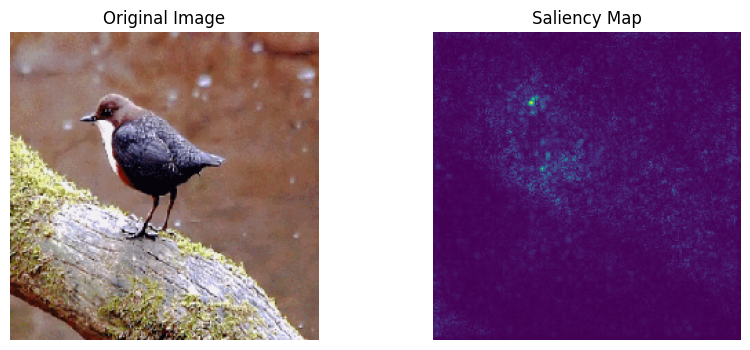

In [24]:
preds = model.predict(x)           
print('Predicted:', decode_predictions(preds, top=3)[0])
predicted_class = np.argmax(preds[0])   # get the predicted class with the largest probability

saliency_map = compute_saliency(model, x, predicted_class)  # compute the saliency map for the predicted class
saliency_map = (saliency_map - tf.reduce_min(saliency_map)) / (tf.reduce_max(saliency_map) - tf.reduce_min(saliency_map))   # Normalization
saliency_map = saliency_map.numpy()  # Convert the saliency map to a NumPy array


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map[0], cmap='viridis')
plt.title('Saliency Map')
plt.axis('off')
plt.show()
